<h1> UV-Disparity Maps Tutorial </h1>

<h3>Taking input</h3>

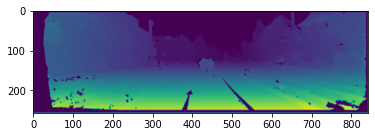

In [1]:
 
import cv2 
import numpy as np 
import time
from matplotlib import pyplot as plt

  
# Reading the input image -> depth map
img = cv2.imread('original2.png', 0)  
plt.imshow(img)


<h3> Erosion and Dilation - For Noise Removal </h3>

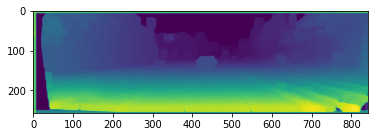

In [2]:
#Erosion and Dilation will be used to removed the noise from the depth map

# Taking a matrix of size 5 as the kernel 
kernel = np.ones((5,5), np.uint8) 
  
img_dilation = cv2.dilate(img, kernel, iterations=3) 
img_erosion = cv2.erode(img_dilation, kernel, iterations=2) 
image=img_dilation


plt.imshow(image)
plt.show()
  


<h2>UV-Disparity Map</h2>

**Disparity value**: This gives a measure of depth at which an object is present -> pixel value in an depth image. 


**V-Disparity Map**: For each row calulate the frequency of a particular disparity value.


**U-Disparity Map**: For each column calulate the frequency of a particular disparity value.

Let's understand this using a simple example. 
- Imagine the image(depth map) to be a matrix of pixel values.
- Here (in the cell below), assume it to be a 5x5 image with pixel values ranging from 1 to 5

| 1    | 2   | 3   | 4   | 5   |
| ---  | --- | --- | --- | --- |
| 4    | 5   | 4   | 5   | 5   |
| 5    | 5   | 4   | 5   | 4   |
| 3    | 5   | 4   | 4   | 3   |
| 2    | 4   | 3   | 2   | 2   |
| 1    | 3   | 2   | 1   | 1   |

**Understanding V-Disparity maps**  
- In the 1st row frequency of 4 is 2 and frequency of 5 is 3, and frequency of remaining pixels is zero, so the v-disparity map may look like something shown below.
- Another observation: sum of values in any row is equal to the number of columns

| 1    | 2   | 3   | 4   | 5   |
| ---  | --- | --- | --- | --- |
| 0    | 0   | 0   | 2   | 3   |
| 0    | 0   | 0   | 2   | 3   |
| 0    | 0   | 2   | 2   | 1   |
| 0    | 3   | 1   | 1   | 0   |
| 3    | 1   | 1   | 0   | 0   |

**Understanding U-Disparity maps**  
- In the 1st column frequency of each pixel values from 1 to 5 is 1.
- In the 2nd column frequency of 5 is 3, and frequency of 4 and 3 is 1.
- Another observation: sum of values in any column is equal to the number of rows.
- This is how u-disparity map would look like, as shown below:

| id   | 1   | 2   | 3   | 4   | 5   |  
| ---  | --- | --- | --- | --- | --- |
| 1    | 1   | 0   | 0   | 1   | 1   |
| 2    | 1   | 0   | 1   | 1   | 1   |
| 3    | 1   | 1   | 1   | 0   | 1   |
| 4    | 1   | 1   | 3   | 1   | 1   |
| 5    | 1   | 3   | 0   | 2   | 1   |

In [3]:

#Masking is used on top of disparity maps for making disparity maps more clearly visible

def masking(disparity_map):    
    converted_map=disparity_map
    
    #Create a black mask filter to color all the pixels with values less than 5 to black
    black_mask_filter = converted_map < 5
    
    #apply the color map -> red indicates values in greater depth and blue indicates values in lesser depth
    converted_map = cv2.applyColorMap(converted_map, cv2.COLORMAP_JET)
    
    #apply black mask filter
    converted_map[ black_mask_filter] = 0
    return converted_map


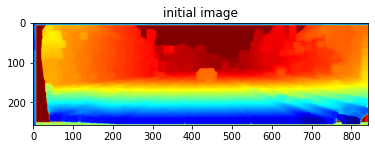

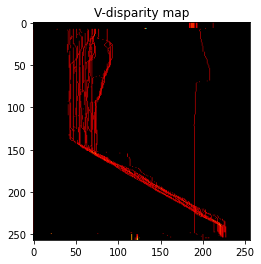

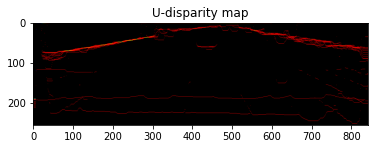

In [4]:

#max disparity value
#max disparity = 256, as the data type of image is uint8 which ranges from 0 to 256
max_disp = 256


IMAGE_HEIGHT,IMAGE_WIDTH = image.shape



# calculate v-disparity
vdisparity = np.zeros((IMAGE_HEIGHT, max_disp), np.uint8)


for i in range(IMAGE_HEIGHT):
    # find frequency of pixels in range 0-max_disp
    for j in range(0,max_disp):
        vdisparity[i][image[i][j]]+=1
    
    


# calculate u-disparity
udisparity = np.zeros((max_disp, IMAGE_WIDTH), np.uint8)


for i in range(IMAGE_WIDTH):
    # find frequency of pixels in range 0-max_disp
     for j in range(0,max_disp):
        udisparity[image[j][i]][i]+=1
    

image = cv2.applyColorMap(image, cv2.COLORMAP_JET)

#plotting the images
plt.imshow(image)
plt.title("initial image")
plt.show()

plt.imshow(masking(vdisparity))
plt.title("V-disparity map")
plt.show()

plt.imshow(masking(udisparity))
plt.title("U-disparity map")
plt.show()


